In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train=pd.read_table('train.tsv',nrows=100000)
test=pd.read_table('test.tsv',nrows=50000)

In [5]:
train.sample(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
84521,84521,MAXIMUM STRENGTH CRACKED HEEL [rm],1,Beauty/Skin Care/Feet,Avon,6.0,1,FOOTWORKS 1.7 OZS 2 FOR [rm] 3 FOR [rm] 4 FOR ...
23694,23694,Americana Irma 2XL Lularoe,1,Women/Tops & Blouses/Tunic,LuLaRoe,15.0,1,BNWT Americana Irma-2XL Lularoe Flags and Stat...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
train_id             100000 non-null int64
name                 100000 non-null object
item_condition_id    100000 non-null int64
category_name        99583 non-null object
brand_name           57076 non-null object
price                100000 non-null float64
shipping             100000 non-null int64
item_description     100000 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
test_id              50000 non-null int64
name                 50000 non-null object
item_condition_id    50000 non-null int64
category_name        49765 non-null object
brand_name           28654 non-null object
shipping             50000 non-null int64
item_description     50000 non-null object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


In [8]:
train.describe()

,train_id,item_condition_id,price,shipping
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,1.907760,26.698405,0.447530
std,28867.657797,0.902773,37.942441,0.497242
min,0.000000,1.000000,0.000000,0.000000
25%,24999.750000,1.000000,10.000000,0.000000
50%,49999.500000,2.000000,17.000000,0.000000
75%,74999.250000,3.000000,29.000000,1.000000
max,99999.000000,5.000000,1506.000000,1.000000


In [9]:
train['brand_name'].value_counts()

PINK                 3707
Nike                 3623
Victoria's Secret    3227
LuLaRoe              2115
Apple                1149
FOREVER 21           1044
Nintendo             1030
Lululemon             980
Michael Kors          907
American Eagle        893
Sephora               806
Rae Dunn              806
Adidas                702
Bath & Body Works     697
Coach                 694
Disney                653
Funko                 633
Under Armour          567
Sony                  559
Old Navy              529
Carter's              443
Hollister             434
Urban Decay           426
The North Face        425
Independent           399
Too Faced             397
Xbox                  370
Brandy Melville       357
MAC                   353
Kendra Scott          345
                     ... 
Dexter                  1
Architect               1
Physicians Prefer       1
Jinx                    1
All American            1
Polar                   1
Wallflower              1
Onyx Nite   

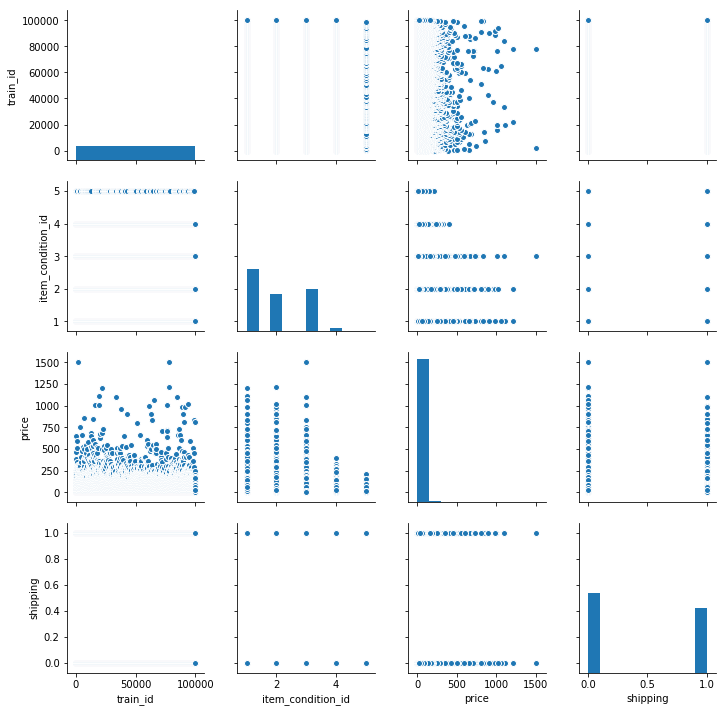

In [28]:
sns.pairplot(train)

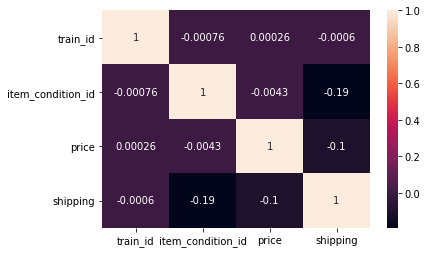

In [33]:
sns.heatmap(train.corr(),annot=True)

C:\Users\MY\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


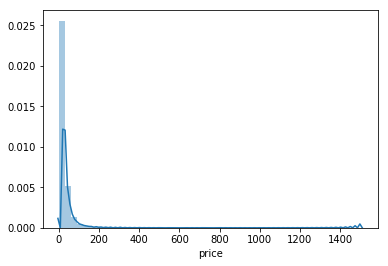

In [34]:
sns.distplot(train['price'])

In [10]:
train.apply(lambda x:sum(x.isnull()))

train_id                 0
name                     0
item_condition_id        0
category_name          417
brand_name           42924
price                    0
shipping                 0
item_description         0
dtype: int64

### replace less frequent values with other

In [47]:
temp=train['brand_name'].value_counts()

In [48]:
temp=temp[temp < 10].index
temp

Index(['Thomas & Friends', 'Antonio Melani', 'Obey', 'Bumbo', 'Clarins',
       'Justin', 'Frankie's Bikinis', 'US POLO ASSN', 'Missguided', 'Starter',
       ...
       'Freestyle', 'My Brest Friend', 'Akademiks', 'Aiptek', 'Chloe + Isabel',
       'Yosi Samra', 'Essie', 'ECI', 'Foreign Exchange', 'Ameda'],
      dtype='object', length=1593)

In [49]:
train['brand_name']=train['brand_name'].replace({x:'other' for x in temp})
train['brand_name'].value_counts()

other                  3782
PINK                   3707
Nike                   3623
Victoria's Secret      3227
LuLaRoe                2115
Apple                  1149
FOREVER 21             1044
Nintendo               1030
Lululemon               980
Michael Kors            907
American Eagle          893
Rae Dunn                806
Sephora                 806
Adidas                  702
Bath & Body Works       697
Coach                   694
Disney                  653
Funko                   633
Under Armour            567
Sony                    559
Old Navy                529
Carter's                443
Hollister               434
Urban Decay             426
The North Face          425
Independent             399
Too Faced               397
Xbox                    370
Brandy Melville         357
MAC                     353
                       ... 
Gilligan & O'Malley      11
Willow Tree              10
Zumba                    10
Nike Golf                10
True Religion       